# Hypothesis Testing



Credits: https://www.kaggle.com/code/hamelg/python-for-data-24-hypothesis-testing

In [6]:
%matplotlib inline

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math

In [12]:
# Data Generation

np.random.seed(6)

# intentionally making mu different between population and sample
population_ages = stats.poisson.rvs(mu=50, size=100000)
minnesota_ages = stats.poisson.rvs(mu=49.7, size=200)

In [13]:
minnesota_ages

array([45, 44, 41, 39, 56, 50, 46, 53, 48, 49, 59, 56, 45, 43, 52, 49, 47,
       59, 48, 48, 38, 49, 50, 46, 49, 53, 58, 44, 46, 52, 48, 44, 43, 55,
       62, 42, 60, 42, 36, 44, 37, 51, 43, 42, 46, 63, 47, 42, 42, 63, 50,
       55, 37, 51, 56, 42, 47, 44, 60, 58, 51, 43, 51, 46, 43, 64, 55, 34,
       53, 56, 45, 45, 52, 51, 55, 38, 46, 43, 39, 37, 36, 60, 51, 37, 50,
       39, 43, 46, 45, 42, 49, 52, 48, 58, 45, 49, 61, 46, 49, 56, 58, 61,
       49, 41, 62, 48, 52, 45, 56, 51, 49, 55, 33, 41, 50, 61, 52, 56, 27,
       56, 52, 51, 48, 69, 44, 44, 49, 44, 53, 60, 49, 56, 50, 43, 48, 56,
       41, 50, 59, 54, 64, 62, 47, 57, 43, 39, 51, 34, 48, 42, 49, 61, 52,
       54, 57, 44, 58, 54, 56, 49, 50, 55, 49, 50, 56, 52, 46, 40, 46, 53,
       52, 63, 49, 46, 52, 57, 39, 45, 54, 58, 55, 49, 48, 52, 38, 50, 46,
       50, 41, 54, 51, 41, 53, 58, 68, 53, 46, 54, 51, 60])

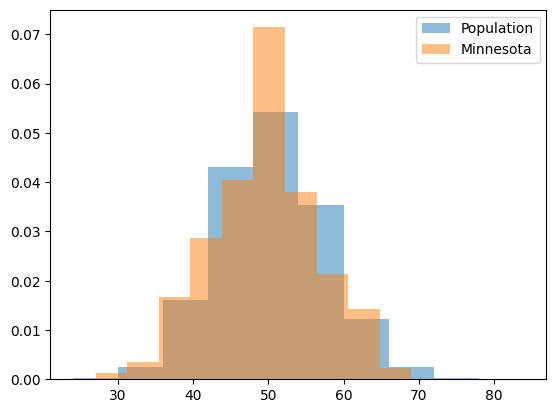

In [14]:
plt.hist(population_ages, alpha=0.5, density=True, label='Population');
plt.hist(minnesota_ages, alpha=0.5, density=True, label='Minnesota');
plt.legend(loc='upper right')
plt.show()

In [15]:
print( population_ages.mean() )
print( minnesota_ages.mean() )

49.99041
49.485


Is the height of people from Minnosota different from the entire population? Is the difference in means enough? How confident are we? To answer, we use p-value

In [16]:
stats.ttest_1samp(a = minnesota_ages,               # Sample data
                 popmean = population_ages.mean())  # Pop mean

TtestResult(statistic=-0.9883315599149414, pvalue=0.3241904585853773, df=199)

The test result shows the test statistic "t" is equal to -2.574. This test statistic tells us how much the sample mean deviates from the null hypothesis.

Just by chance, the probability of seeing a difference of -2.57 or more extreme between means of sample and population is 1.3%. This is very low. So the difference must not be due to change and there is a actually a difference.

# EDA (Exploratory Data Analysis)


Checklist of things to do during EDA
* Investigate missing values
* Understand outliers
* Add filters, transform and scale data
* Calculate numerical summaries

-- *Above points covered somewhat in intro-to-pandas*

* Generate plots to explore relationships
* Handle proportions correctly
* Use tables to scan data
* Search for patterns




In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics, datasets, decomposition, preprocessing
sns.set()

In [18]:

iris = datasets.load_iris(as_frame=True)
# iris


In [19]:
# iris.keys()

In [20]:
iris_data = iris["data"]
# iris_data.head()

In [22]:
iris_data["species"] = [iris["target_names"][sp] for sp in iris["target"]]
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<ipython-input-104-cf45b8348e05>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(iris_data, x='petal width (cm)', y='species', inner='stick', palette='Dark2')


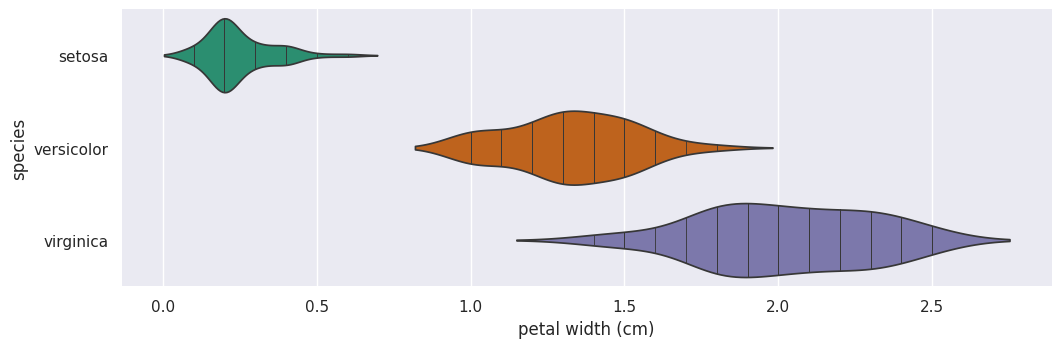

In [ ]:
# @title species vs petal width (cm)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(iris_data['species'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(iris_data, x='petal width (cm)', y='species', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
# Size and missingness
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
# Central Tendency, Variability
iris_data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
iris_data.groupby("species").agg(["mean"])

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
,mean,mean,mean,mean
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


<ipython-input-78-fa12b6100e82>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(iris_data, x='petal width (cm)', y='species', inner='stick', palette='Dark2')


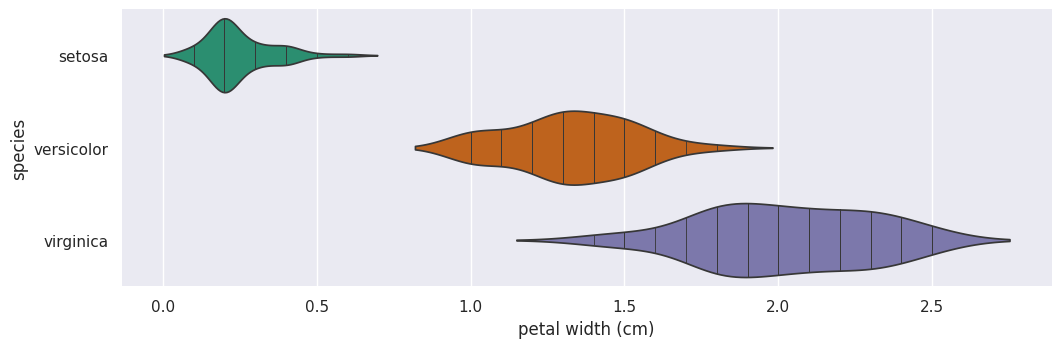

In [ ]:
figsize = (12, 1.2 * len(iris_data['species'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(iris_data, x='petal width (cm)', y='species', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

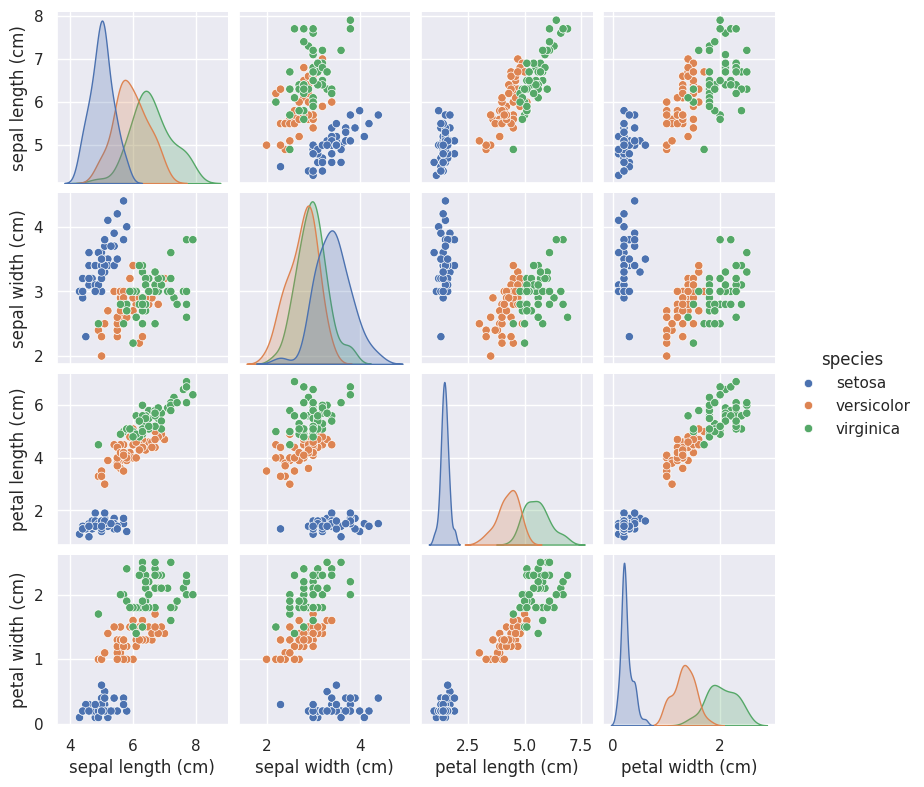

In [ ]:
# Bivariate analysis, Distribution of variables, Variability

sns.pairplot(iris_data, hue="species", height=2)

[]

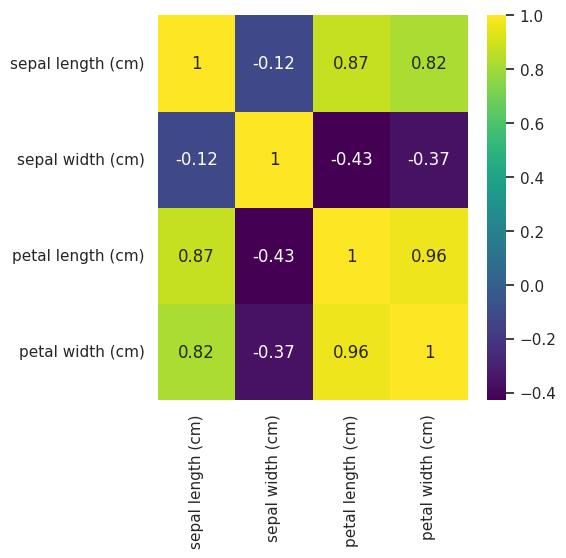

In [23]:
plt.figure(figsize=(5,5))
sns.heatmap(iris_data.loc[:, iris_data.columns != 'species'].corr(), annot=True, cmap="viridis")
plt.plot()
